<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Takeo_Assignment_Bangaluru_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis (EDA) is a crucial step in the data preprocessing process. It helps you understand your dataset, identify patterns, anomalies, and make informed decisions about data cleaning and feature engineering. Here's a is a task of EDA using Bangaluru House Price:

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bengaluru_house_prices.csv to bengaluru_house_prices.csv


In [3]:
filename = next(iter(uploaded))

In [6]:
# Load your dataset
df = pd.read_csv(filename)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [14]:
# 1. Get a quick overview of the data
df.head() # Display the first few rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [16]:
df.info()  # Display data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [17]:
df.describe() # Summary statistics

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


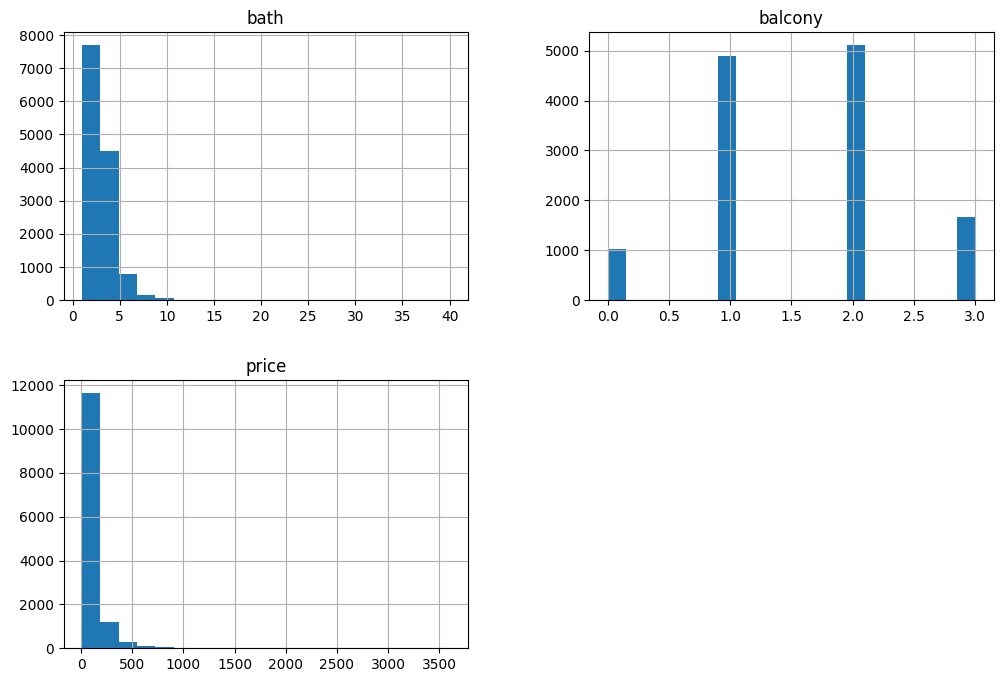

In [18]:
# 2. Data Visualization
# - Histograms for numerical variables
df.hist(bins=20, figsize=(12, 8))
plt.show()

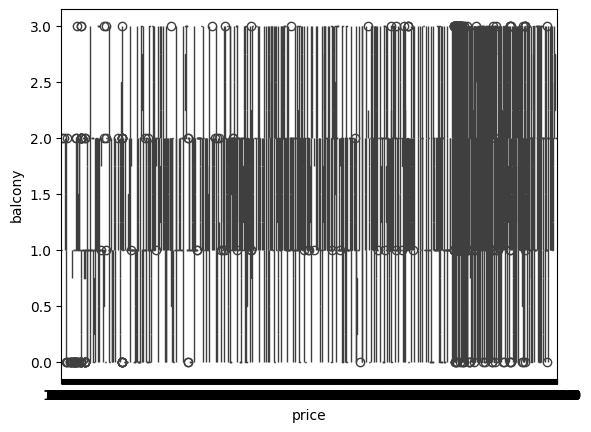

In [23]:
  # - Box plots for numerical variables
sns.boxplot(x=df['price'], y=df['balcony'], data=df)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('your_dataset.csv')

# 1. Get a quick overview of the data
print(data.head())  # Display the first few rows
print(data.info())  # Display data types and missing values
print(data.describe())  # Summary statistics

# 2. Data Visualization
# - Histograms for numerical variables
data.hist(bins=20, figsize=(12, 8))
plt.show()

# - Box plots for numerical variables
sns.boxplot(x='target_column', y='numerical_column', data=data)
plt.show()

# - Countplots for categorical variables
sns.countplot(x='categorical_column', data=data)
plt.xticks(rotation=45)
plt.show()

# 3. Handling Missing Values
# - Check for missing values
print(data.isnull().sum())

# - Decide on how to handle missing values (impute or drop)
# Example: Impute with mean for numerical columns
data['numerical_column'].fillna(data['numerical_column'].mean(), inplace=True)

# 4. Outlier Detection and Handling
# - Identify outliers using z-scores or IQR
from scipy import stats
z_scores = np.abs(stats.zscore(data['numerical_column']))
outliers = (z_scores > 3)
outlier_indices = data[outliers].index

# - Handle outliers (remove or transform)
data.drop(outlier_indices, inplace=True)

# 5. Feature Engineering
# - Create new features if needed
data['new_feature'] = data['feature1'] + data['feature2']

# 6. Correlation Analysis
# - Calculate correlation matrix
correlation_matrix = data.corr()

# - Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# 7. Data Distribution Analysis
# - Check if the target variable is balanced
sns.countplot(x='target_column', data=data)
plt.show()

# 8. Data Transformation (if needed)
# - Encode categorical variables (e.g., one-hot encoding)
data = pd.get_dummies(data, columns=['categorical_column'])

# 9. Data Splitting (Train/Test)
# - Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Save the preprocessed data if necessary
data.to_csv('preprocessed_data.csv', index=False)
